# Лабораторная работа 5 — Классификация 

Вариант 1

Набор данных: `medical_diagnosis.csv`.

**Цель:** изучение алгоритмов и методов классификации на практике.

#### 1. Загрузка набора данных


Были выведены размер датасета, первые 5 строк и информация о столбцах, которая показывает, что в данных нет пропусков и все типы данных определены верно.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, balanced_accuracy_score, confusion_matrix, 
                             roc_curve, roc_auc_score, )

df = pd.read_csv('medical_diagnosis.csv')

print("Размер датасета:", df.shape)
display(df.head())
display(df.info())

Размер датасета: (3031, 14)


,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

None

Датасет содержит информацию о болезнях
- age — возраст пациента (лет), числовой.
- sex — пол: Male / Female, категориальный.
- BMI — индекс массы тела (кг/м²), числовой.
- systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.
- cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.
- fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.
- smoking_status — статус курения: Never / Former / Current, категориальный.
- family_history — наследственность по заболеванию: Yes / No, категориальный.
- activity_level — уровень физической активности: Low / Moderate / High,
категориальный.
- symptom_score — суммарная выраженность симптомов (0–10), числовой.
- CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.
- WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.
- ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.
- Disease — целевой класс: 1 — болеет, 0 — не болеет.


#### 2. Предобработка данных

Были использованы методы describe и value_counts для того чтобы оценить данные и выявить неявные дубликаты, видно что в них нет необычных выбросов или неявных дубликатов в категориальных данных.

In [4]:
display(df.describe())
display(df['sex'].value_counts())
display(df['smoking_status'].value_counts())
display(df['family_history'].value_counts())
display(df['activity_level'].value_counts())
display(df['ECG_result'].value_counts())

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,53.176509,26.465886,122.417684,202.744903,94.366216,2.040185,1.380625,6.825094,0.016166
std,20.740090,5.869822,17.859825,53.735636,19.547096,1.357714,3.159757,1.980929,0.126136
min,18.000000,13.500000,82.000000,85.000000,56.000000,0.000000,0.100000,2.300000,0.000000
25%,35.000000,22.500000,110.000000,171.000000,80.500000,1.000000,0.100000,5.480000,0.000000
50%,53.000000,26.300000,122.000000,200.000000,94.000000,2.000000,0.520000,6.750000,0.000000
75%,71.000000,30.400000,134.000000,232.000000,107.000000,3.000000,1.460000,8.150000,0.000000
max,89.000000,50.900000,184.000000,658.200000,163.000000,6.800000,43.450000,13.720000,1.000000


sex
Male      1526
Female    1505
Name: count, dtype: int64

smoking_status
Never      1540
Former      923
Current     568
Name: count, dtype: int64

family_history
No     2010
Yes    1021
Name: count, dtype: int64

activity_level
Moderate    1370
Low         1050
High         611
Name: count, dtype: int64

ECG_result
Normal              2382
ST-T abnormality     531
LVH                  118
Name: count, dtype: int64

#### 3. Выделение целевой переменной
Целевой переменной в данном исследовании является показатель Disease, отражающий наличие заболевания у пациента (1 — болен, 0 — не болен).
Для подготовки данных к моделированию столбец Disease был выделен в отдельную переменную y, а остальные признаки сформировали матрицу признаков X, не содержащую целевого столбца. 
Была построена матрица диаграмм рассеяния, в которой были выделены значения целевой переменной разными цветами.

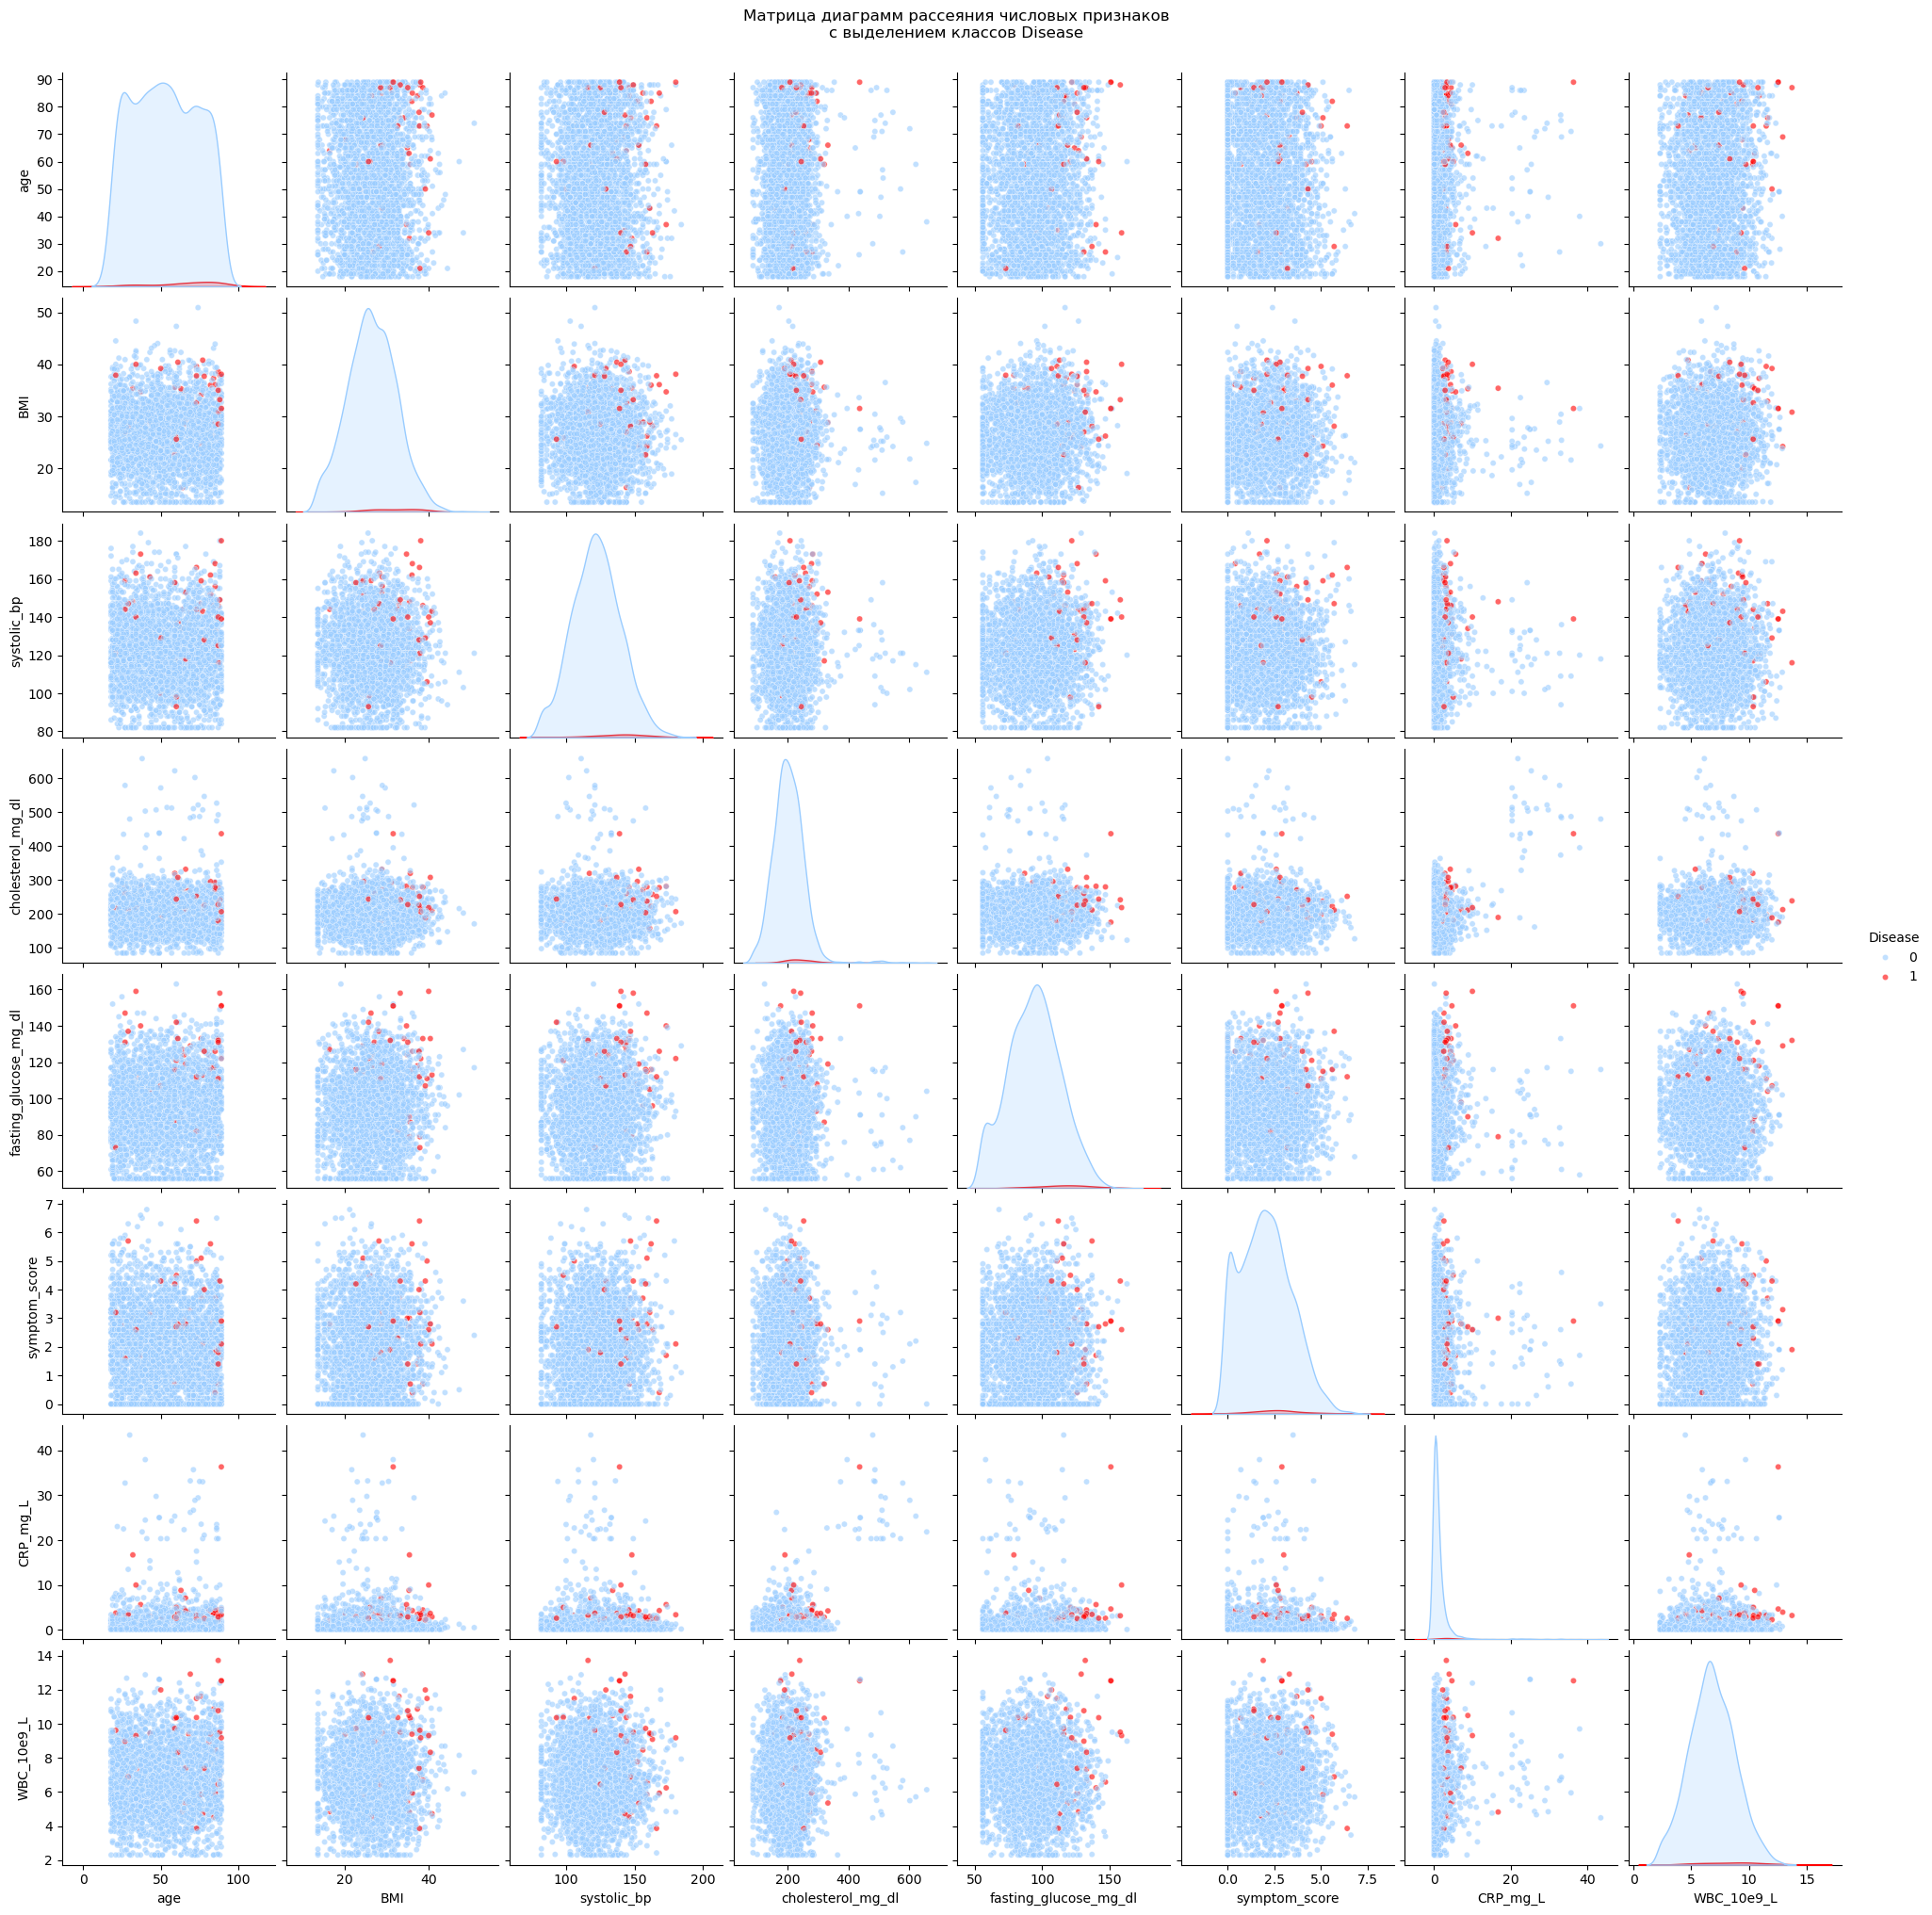

In [5]:
y = df['Disease']      # целевая переменная
X = df.drop('Disease', axis=1)   # признаки для модели

num_cols = ['age','BMI','systolic_bp','cholesterol_mg_dl',
                'fasting_glucose_mg_dl','symptom_score','CRP_mg_L','WBC_10e9_L']

sns.pairplot(df[num_cols + ['Disease']], hue='Disease', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 20},
             palette={0: '#99CCFF', 1: '#FF0000'})

plt.suptitle("Матрица диаграмм рассеяния числовых признаков\nс выделением классов Disease", y=1.02)
plt.show()

По полученным диаграммам можно сделать следующие выводы:
- больные чаще встречаются в старших возрастных группах (от 60 до 80 лет), хотя и присутствуют и среди молодых. Это говорит о том, что возраст — один из факторов риска, но не единственный.
- у больных чаще наблюдается повышенное артериальное давление (особенно выше 140 мм рт. ст.).
- У больных пациентов часто наблюдаются более высокие уровни холестерина (особенно выше 250 мг/дл).
- Больные пациенты чаще имеют повышенный уровень глюкозы (выше 100–110 мг/дл), что указывает на связь заболевания с нарушениями углеводного обмена или сахарным диабетом.
- У больных пациентов средний балл симптомов заметно выше. Многие красные точки сосредоточены в диапазоне 3–6, тогда как у здоровых — в основном 0–2. 
- У больных пациентов значительно чаще наблюдаются высокие уровни CRP — маркера воспаления. Это говорит о том, что заболевание может сопровождаться системным воспалительным процессом.
- У больных пациентов чаще наблюдаются повышенные значения WBC (особенно выше 8–9 ×10⁹/л), что указывает на воспалительную реакцию организма.

#### 4. Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split и выполнение стандартизации числовых данных.

Был применен метод One-Hot Encoding для категориальных признаков.
Для нормализации масштаба числовых признаков применён StandardScaler, который приводит данные к нулевому среднему и единичному стандартному отклонению.

Данные разделены на train и test выборки (70/30). Использовалось стратифицированное разбиение (stratify=y), чтобы сохранить одинаковое соотношение классов.

In [6]:
cat_cols = ['sex', 'smoking_status', 'family_history',
            'activity_level', 'ECG_result']
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

num_cols_encoded = [col for col in num_cols if col in X_encoded.columns]

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_encoded] = scaler.fit_transform(X_train[num_cols_encoded])
X_test_scaled[num_cols_encoded] = scaler.transform(X_test[num_cols_encoded])

print("Размеры выборок:")
print(f"Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")

Размеры выборок:
Train: (2121, 16), Test: (910, 16)


#### 5. Разработка предсказательной модели качественного отклика методами: метод k- ближайших соседей, дерево решений, логистическая регрессия, случайный лес.


Для моделей использовались предварительно подготовленные выборки:
- масштабированные данные (X_train_scaled, X_test_scaled) — для алгоритмов, чувствительных к масштабу признаков;
- исходные данные (X_train, X_test) — для моделей на основе деревьев решений.

In [7]:
# Обучение и предсказание методом KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Обучение и предсказание методом дерева решений
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Обучение и предсказание методом логистической регрессии
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Обучение и предсказание методом случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### 6. Оценка ошибки классификации для каждого метода. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'.

In [8]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n {model_name} ")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y_true, y_pred))

evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



 KNN 
Accuracy: 0.9835164835164835
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Balanced Accuracy: 0.5

 Decision Tree 
Accuracy: 0.9692307692307692
Precision: 0.15789473684210525
Recall: 0.2
F1-score: 0.17647058823529413
Balanced Accuracy: 0.5910614525139665

 Logistic Regression 
Accuracy: 0.9868131868131869
Precision: 1.0
Recall: 0.2
F1-score: 0.3333333333333333
Balanced Accuracy: 0.6

 Random Forest 
Accuracy: 0.9846153846153847
Precision: 1.0
Recall: 0.06666666666666667
F1-score: 0.125
Balanced Accuracy: 0.5333333333333333


C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Все модели демонстрируют искусственно завышенную общую точность (Accuracy) — от 96.9% до 98.7%, что создаёт ложное впечатление высокой эффективности. Однако Recall (полнота) у всех моделей крайне низкий — от 0% до 20%. Это прямо указывает на серьёзный дисбаланс классов: заболевание встречается всего у ~1.6% пациентов, и модели по умолчанию «выбирают» безопасную стратегию — предсказывать отсутствие болезни у всех.

- Дерево решений — наилучший Recall
Recall: 20.0% — самое высокое значение среди всех моделей, то есть дерево решений обнаруживает каждого пятого больного пациента.
F1-score: 0.176 — второй по качеству (после логистической регрессии).
Balanced Accuracy: 0.591 — превышает 0.5, подтверждая способность модели к дифференциации классов.
Вывод: если главная цель — максимально выявить реальные случаи болезни, дерево решений является наиболее подходящим вариантом, несмотря на умеренную точность (96.9%) и низкую Precision (15.8%).
- Логистическая регрессия — лучший баланс Precision и Recall
Precision: 1.0 — все пациенты, которых модель назвала больными, действительно больны.
Recall: 20.0% — такой же, как у дерева решений.
F1-score: 0.333 — наивысший среди всех моделей, что указывает на лучший компромисс между полнотой и точностью.
Balanced Accuracy: 0.60 — самый высокий показатель.
Вывод: логистическая регрессия обеспечивает наиболее сбалансированное поведение и может быть предпочтительна в сценариях, где недопустимы ложные диагнозы, но при этом важно сохранить умеренную чувствительность.
- Случайный лес — высокая точность, но крайне низкий Recall
Precision: 1.0 — как и у логистической регрессии, все положительные предсказания верны.
Recall: всего 6.7% — модель пропускает 93% реальных случаев заболевания.
Balanced Accuracy: 0.533 — самый низкий среди моделей с ненулевым Recall.
Вывод: несмотря на идеальную Precision, случайный лес практически бесполезен для скрининга, так как почти никогда не выявляет больных. Не рекомендуется для данной задачи.
- KNN
Recall: 0.0%, Precision: 0.0%, F1-score: 0.0% — модель не обнаружила ни одного больного пациента.
Balanced Accuracy: 0.5 — эквивалентно случайному угадыванию.
Вывод: KNN полностью игнорирует редкий класс и предсказывает только здоровых. Модель непригодна для диагностики, несмотря на высокую Accuracy (98.4%).

Лучшая модель с точки зрения общего качества — логистическая регрессия: она обеспечивает наивысший F1-score, идеальную Precision и приемлемый Recall, что делает её подходящей для клинического использования, где важны и надёжность диагноза, и умеренная чувствительность.
Если приоритет — обнаружить как можно больше больных пациентов, даже ценой дополнительных обследований, дерево решений предпочтительнее, так как оно демонстрирует наивысший Recall.
Случайный лес и KNN не рекомендуются: первый слишком редко выявляет заболевание (Recall = 6.7%), а второй полностью игнорирует его (Recall = 0%).

#### 7. Построение матрицы неточностей с помощью confusion_matrix для каждого метода.

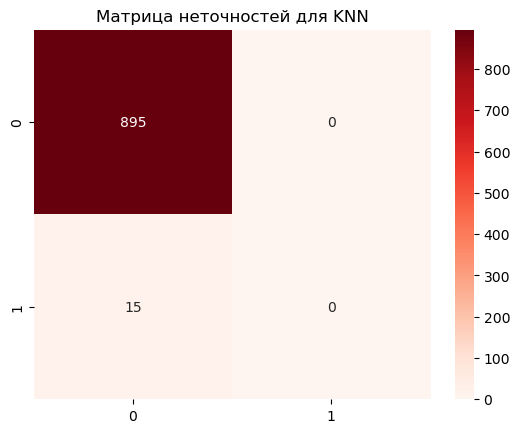

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds')
plt.title("Матрица неточностей для KNN")
plt.show()

#### Выводы по матрице неточностей KNN

- True Negative (TN) = 895:
Модель правильно предсказала, что 895 пациентов не больны — это истинные отрицательные случаи. Это основная масса данных, так как здоровых пациентов в выборке подавляющее большинство.
- False Positive (FP) = 0:
Модель не выдала ни одного ложноположительного результата — то есть не ошиблась, назвав здорового пациента больным.
- False Negative (FN) = 15:
Модель неправильно предсказала 15 больных пациентов как здоровых. Это критически важный показатель — эти пациенты были пропущены, что в медицинской диагностике может иметь серьёзные последствия.
- True Positive (TP) = 0:
Модель не обнаружила ни одного реального случая заболевания — все 15 больных пациентов были отнесены к классу «здоров».

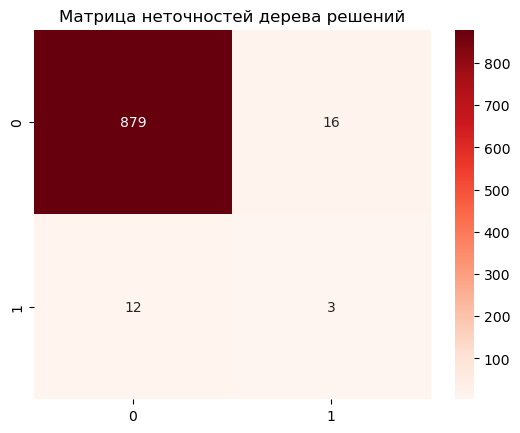

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Reds')
plt.title("Матрица неточностей дерева решений")
plt.show()

#### Выводы по матрице неточностей дерева решений
 
Модель правильно выявила 3 из 15 больных пациентов (True Positive = 3), что соответствует Recall = 20% — наивысшему значению среди всех рассмотренных методов. Это означает, что каждый пятый реальный случай заболевания был обнаружен, что является важным достижением в условиях сильного дисбаланса классов.\
False Negative (FN) = 12:
Модель неправильно классифицировала 12 больных пациентов как здоровых. Эти случаи — самые опасные с клинической точки зрения, так как заболевание остаётся необнаруженным.\
Одновременно модель ошибочно отнесла к группе риска 16 здоровых пациентов (False Positive = 16), что привело к Precision = 15.8%. Хотя это указывает на высокий уровень ложных срабатываний, в контексте медицинской диагностики такой компромисс может быть оправдан: предпочтительнее провести дополнительные обследования у небольшого числа здоровых, чем пропустить реальный случай болезни.



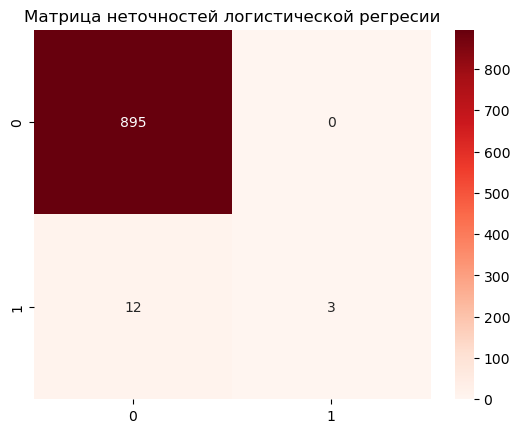

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds')
plt.title("Матрица неточностей логистической регресии")
plt.show()

#### Выводы по матрице неточностей логистической регрессии

- True Positive (TP) = 3 — модель правильно выявила 3 случая заболевания.
- False Positive (FP) = 0 — ни один здоровый пациент не был ошибочно классифицирован как больной.
- False Negative (FN) = 12 — 12 больных пациентов были пропущены (классифицированы как здоровые).
- True Negative (TN) = 895 — все здоровые пациенты, кроме тех, кто попал в FN, были корректно определены.

  
Модель логистической регрессии проявляет консервативную стратегию: она выдаёт диагноз «болен» только в самых уверенных случаях, полностью исключая ложные срабатывания.

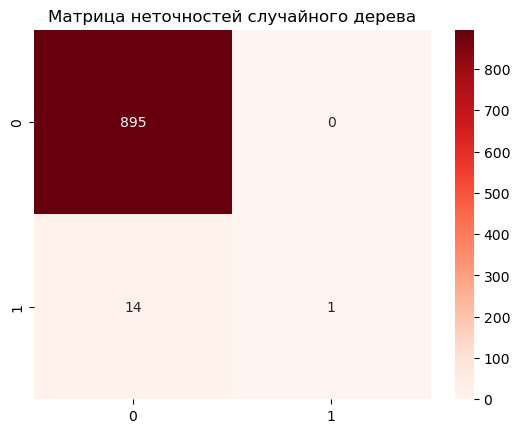

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title("Матрица неточностей случайного дерева")
plt.show()

#### Выводы по матрице неточностей случайного леса

- True Positive (TP) = 1 — модель правильно выявила всего один случай заболевания. Это означает, что из всех больных пациентов (15 человек: 14 + 1) она обнаружила лишь 6.7%.
- False Positive (FP) = 0 — ни один здоровый пациент не был ошибочно классифицирован как больной. Модель полностью избегает ложных срабатываний.
- False Negative (FN) = 14 — 14 больных пациентов были пропущены и ошибочно отнесены к группе здоровых. Это составляет 93.3% от всех реальных случаев заболевания.
- True Negative (TN) = 895 — все здоровые пациенты, кроме тех, кто попал в FN, были корректно определены.

  Модель случайного леса, несмотря на высокую общую точность и идеальную Precision, не способна эффективно решать задачу выявления редкого заболевания. Её чрезмерная консервативность приводит к тому, что почти все реальные случаи болезни остаются незамеченными.

**По полученным матрицам можно сделать следующие выводы:**

Логистическая регрессия — наиболее сбалансированная модель для практического применения
Несмотря на умеренный Recall, она демонстрирует:
Наивысший F1-score (0.333),
Идеальную Precision (1.0),
Лучший Balanced Accuracy (0.60).
Это делает её наиболее надёжной и интерпретируемой моделью в текущем наборе, особенно в контексте медицинского принятия решений, где ложные диагнозы могут иметь серьёзные последствия.

Дерево решений обеспечивает наибольшее количество истинно положительных предсказаний (TP = 3) и наивысший Recall (20%) среди всех моделей. Это делает его подходящим инструментом для задач скрининга или раннего выявления, где приоритетом является обнаружение как можно большего числа больных, даже ценой роста ложных срабатываний.

Остальные же две модели — KNN и случайный лес — показывают критически низкую способность выявлять истинно положительные случаи: KNN не обнаружил ни одного больного пациента (TP = 0), а случайный лес — всего один (TP = 1). Такая нечувствительность к редкому классу делает их непригодными для диагностических задач, где пропуск реального случая заболевания может иметь серьёзные последствия.

#### 8. Построение графика ROC-кривой для каждого метода на одном графике для сравнения

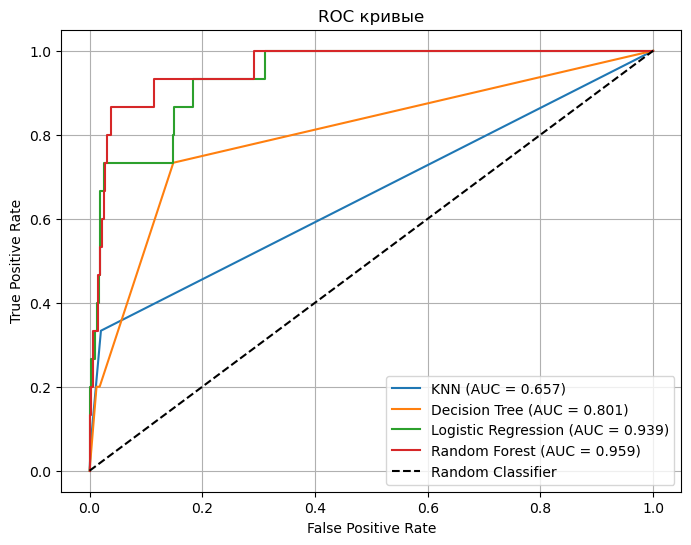

In [17]:
plt.figure(figsize=(8, 6))

# KNN
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1]):.3f})')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]):.3f})')

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.3f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.3f})')

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые')
plt.legend()
plt.grid(True)
plt.show()

#### Выводы:
1. Случайный лес
Несмотря на низкий Recall при стандартном пороге, модель демонстрирует наивысшую способность к дифференциации классов. Это указывает на то, что она обладает большим потенциалом, который можно реализовать путём подбора оптимального порога классификации. В медицинской диагностике это особенно ценно — модель может быть настроена на максимальное выявление больных при контролируемом уровне ложных срабатываний.

2. Логистическая регрессия — вторая по качеству (AUC = 0.939)
Модель показывает отличную дискриминационную способность и высокую стабильность. Её гладкая ROC-кривая и высокий AUC говорят о том, что она надёжно ранжирует пациентов по риску заболевания. Как и случайный лес, она требует настройки порога для достижения оптимального баланса между Recall и Precision.

3. Дерево решений — хороший компромисс (AUC = 0.801)
Хотя AUC ниже, чем у двух предыдущих моделей, дерево решений быстрее достигает высокого TPR при низком FPR, что может быть полезно в задачах, где важна ранняя идентификация. Это делает его перспективным для скрининга, особенно если требуется интерпретируемость правил принятия решений.

4. KNN — слабая модель (AUC = 0.657)
Модель плохо различает классы и не способна эффективно выявлять больных пациентов. Её ROC-кривая близка к диагонали, что указывает на слабую дискриминационную способность. Рекомендуется исключить KNN из дальнейшего рассмотрения без серьёзной доработки (например, с использованием SMOTE и подбора k).

случайный лес и логистическая регрессия являются наиболее перспективными моделями для решения задачи выявления редкого заболевания.

## Выводы по работе:

В ходе выполнения лабораторной работы была решена задача бинарной классификации — прогнозирование редкого заболевания на основе клинических и лабораторных данных. Была проведена предварительная обработка: категориальные переменные оставлены в исходном виде (так как деревья решений и случайный лес не требуют One-Hot-кодирования), а числовые признаки были стандартизированы с использованием `StandardScaler` для моделей, чувствительных к масштабу (KNN и логистическая регрессия). Набор данных был разделён на обучающую и тестовую выборки в соотношении 70/30.

Для решения задачи были реализованы и сравнены четыре метода классификации: k-ближайших соседей (KNN), дерево решений (Decision Tree), логистическая регрессия (Logistic Regression) и случайный лес (Random Forest). Оценка качества моделей проводилась по ключевым метрикам: **Accuracy**, **Precision**, **Recall**, **F1-score**, **Balanced Accuracy** и **ROC AUC**.

**Наилучший баланс между точностью и полнотой продемонстрировала логистическая регрессия** (F1-score = 0.333, Recall = 0.20, Precision = 1.0), что делает её наиболее подходящей моделью для практического применения в условиях, где критически важно избегать ложных диагнозов, но при этом необходимо сохранить умеренную способность выявлять реальные случаи заболевания. Дерево решений показало самый высокий Recall (0.20) — совместно с логистической регрессией оно лучше всех обнаруживало больных пациентов, хотя и с низкой точностью (Precision = 15.8%), что характерно для скрининговых моделей. Случайный лес, несмотря на идеальную Precision (1.0), обладал крайне низким Recall (0.067), то есть пропускал 93% реальных случаев, что делает его малопригодным для задач ранней диагностики. Метод KNN оказался наименее эффективным, полностью игнорируя редкий класс (Recall = 0, F1 = 0).

**Анализ ROC-кривых подтвердил**, что случайный лес (AUC = 0.959) и логистическая регрессия (AUC = 0.939) обладают выдающейся способностью ранжировать пациентов по риску заболевания. Однако лишь логистическая регрессия при стандартном пороге обеспечивает компромисс между обнаружением болезни и контролем ложных предупреждений, в то время как случайный лес требует обязательной настройки порога принятия решения для практического использования.

Таким образом, несмотря на экстремальный дисбаланс классов, логистическая регрессия является наиболее надёжной и сбалансированной моделью для данной задачи, а дерево решений может быть полезно в сценариях, где приоритетом является максимальное выявление больных, даже ценой роста ложных срабатываний. 